In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ds=pd.read_csv('/content/drive/MyDrive/cars_info.csv')

In [4]:
ds.head()

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,12190570,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,12321855,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,12346971,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,12363884,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5


In [12]:
ds.shape

(17048, 16)

In [5]:
ds.isnull().sum()

,0
ID,0
Name,0
Price,0
Brand,0
Model,0
Variant,0
Series,0
Year,0
Kilometers,0
Type,0


#question

In [11]:
#1) What is the average price of cars across different brands, and which brands have the highest and lowest average prices?

average_prices = ds.groupby('Brand')['Price'].mean()


highest_price_brand = average_prices.idxmax()
lowest_price_brand = average_prices.idxmin()


print("Average Prices by Brand", average_prices)
print("Highest Average Price:", highest_price_brand, "- $", average_prices[highest_price_brand])
print("Lowest Average Price:", lowest_price_brand, "- $", average_prices[lowest_price_brand])


Average Prices by Brand Brand
Abarth              37493.800000
Alfa Romeo          49282.545455
Aston Martin       235120.000000
Audi                52605.027027
BMW                 56373.000000
Bentley            181405.428571
Chery                8749.500000
Chevrolet          145833.857143
Chrysler            35253.595238
Citroen             24233.384615
Cupra               62334.200000
Dodge               13836.214286
FPV                 91490.000000
Fiat                20448.529412
Ford                36091.152349
Foton               18972.000000
GWM                 38250.793103
Genesis             64888.000000
Great Wall          12300.851852
HSV                 74036.162162
Haval               32565.285714
Hino                46500.000000
Holden              23343.577409
Honda               23326.019370
Hyundai             27240.912603
Infiniti            32747.777778
Isuzu               42962.951311
Iveco               52990.000000
Jaguar              61976.394737
Jeep         

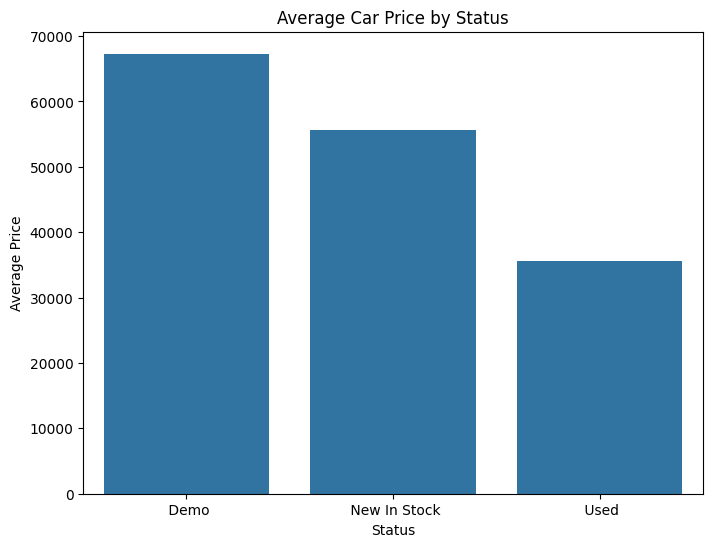

In [15]:
#2) How does the condition of a car (Status) affect its price?

status_price = ds.groupby('Status')['Price'].mean()


plt.figure(figsize=(8, 6))
sns.barplot(x=status_price.index, y=status_price.values)
plt.title('Average Car Price by Status')
plt.xlabel('Status')
plt.ylabel('Average Price')
plt.show()

In [17]:
#3) Is there a correlation between mileage (Kilometers) and the price of a car?

correlation = ds['Kilometers'].corr(ds['Price'])

print(f"The correlation between Kilometers and Price is: {correlation}")

The correlation between Kilometers and Price is: -0.4474897290060361


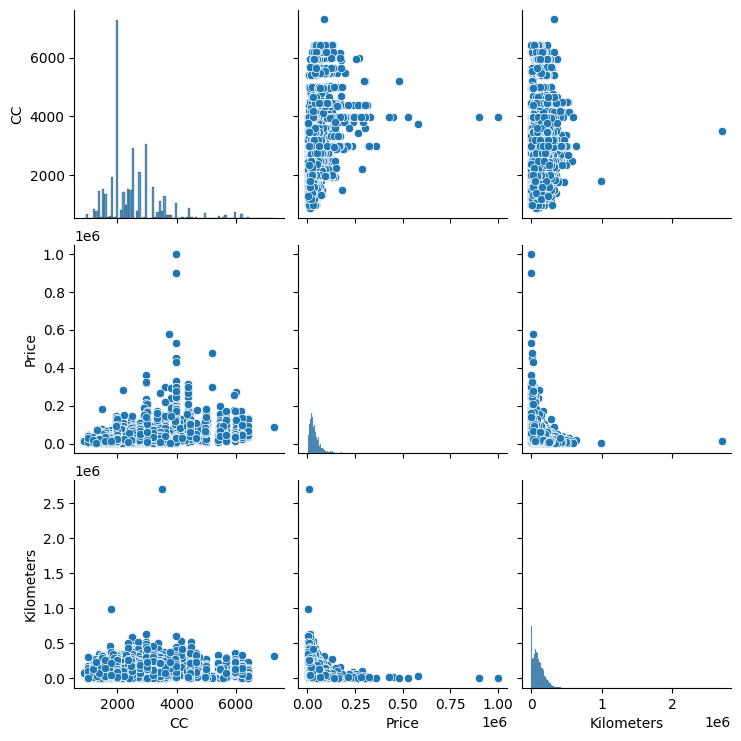

,CC,Price,Kilometers
CC,1.000000,0.298205,0.185219
Price,0.298205,1.000000,-0.447490
Kilometers,0.185219,-0.447490,1.000000


In [19]:
#4) How does engine capacity (CC) relate to car price and mileage?

sns.pairplot(ds[['CC', 'Price', 'Kilometers']])
plt.show()

# Calculate the correlation coefficients
correlation_matrix = ds[['CC', 'Price', 'Kilometers']].corr()
correlation_matrix